# Convolutional Neural Network (CNN)

This notebook demonstrates the use of a basic Convolutional Neural Network (CNN) to perform image classification on the Fashion MNIST dataset, aiming to accurately recognize different categories of clothing from grayscale images.

## Importing Libraries

In [1]:
# Data handling 
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

## Data Loading and Exploration

In [2]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# Structure of input data
print(f"X_train shape: {X_train.shape}") 
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)


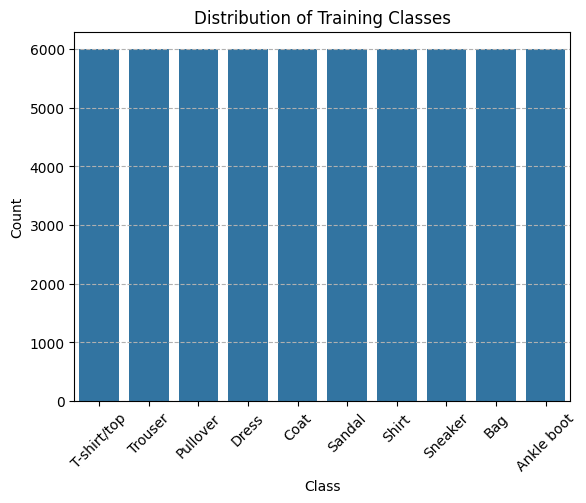

In [4]:
# Plot Class distribution
sns.countplot(x=y_train)
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.title("Distribution of Training Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(True, axis='y', linestyle='--')
plt.show()

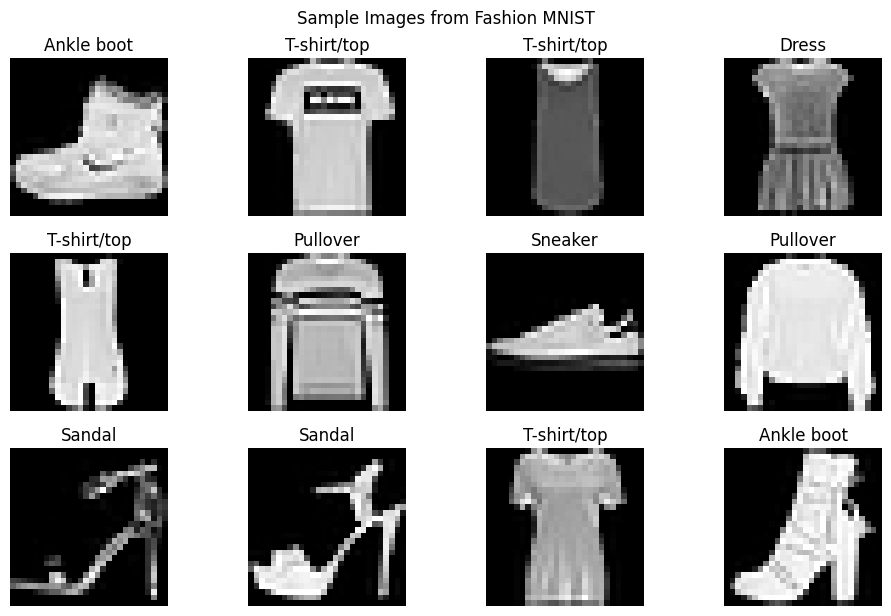

In [5]:
# Visualize sample training images
plt.figure(figsize=(10, 6))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Sample Images from Fashion MNIST", y=1.02)
plt.show()

In [6]:
# Check pixel value range
print("Minimum pixel value:", X_train.min())
print("Maximum pixel value:", X_train.max())

Minimum pixel value: 0
Maximum pixel value: 255


In [7]:
# Check for missing data
print("NaNs in X_train:", np.isnan(X_train).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())

NaNs in X_train: 0
NaNs in y_train: 0


## CNN Model: Preprocessing, Training and Evaluation

In [8]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for CNN input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [9]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback to monitor validation loss
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
750/750 [==============================] - 5s 3ms/step - loss: 0.6295 - accuracy: 0.7695 - val_loss: 0.3993 - val_accuracy: 0.8528
Epoch 2/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4192 - accuracy: 0.8496 - val_loss: 0.3317 - val_accuracy: 0.8783
Epoch 3/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3609 - accuracy: 0.8714 - val_loss: 0.3038 - val_accuracy: 0.8872
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3278 - accuracy: 0.8814 - val_loss: 0.2879 - val_accuracy: 0.8917
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.3021 - accuracy: 0.8895 - val_loss: 0.2742 - val_accuracy: 0.9008
Epoch 6/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2824 - accuracy: 0.8981 - val_loss: 0.2668 - val_accuracy: 0.9020
Epoch 7/20
750/750 [==============================] - 2s 2ms/step - loss: 0.2696 - accuracy: 0.9011 - val_loss: 0.2693 - val_accuracy: 0.9013
Epoch 

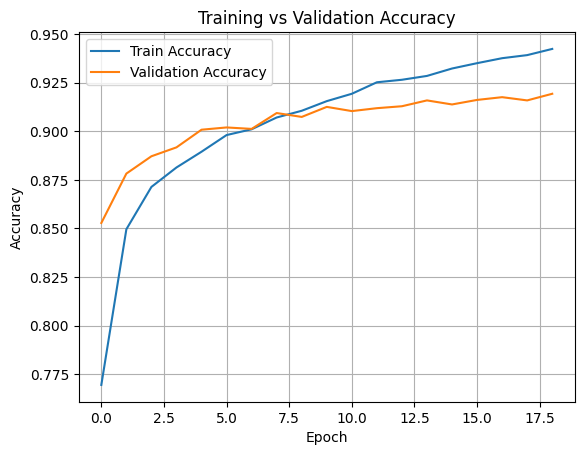

In [10]:
# Plot training and validation accuracy over epochs to monitor overfitting
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 [==============================] - 0s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       1.00      0.97      0.99      1000
           2       0.87      0.86      0.86      1000
           3       0.91      0.92      0.91      1000
           4       0.87      0.85      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.74      0.74      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



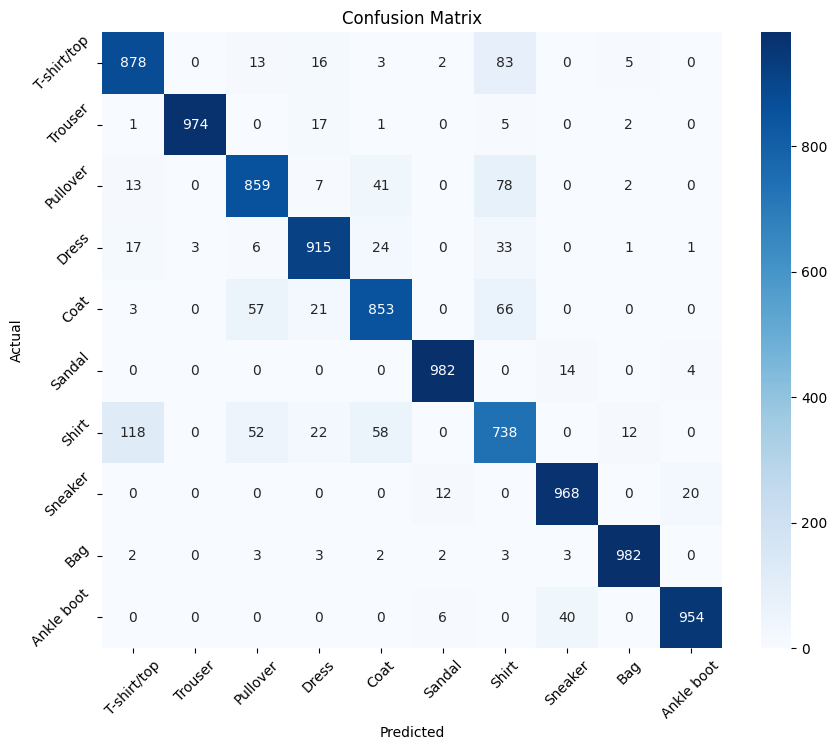

In [11]:
# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Conclusion

This notebook demonstrates the effectiveness of a Convolutional Neural Network (CNN) in classifying grayscale fashion images from the Fashion MNIST dataset.

- Test **Accuracy 91%**, reflecting strong generalization on unseen data
- The model performed exceptionally well on **Class 1 (Trousers)**, **Class 5 (Sandal)**, and **Class 8 (Bag)** with **F1-scores** close to or **above 0.98**
- **Class 6 (Shirt)** had the **lowest performance** with an **F1-score** of **0.74**, likely due to its similarity with other apparel items
- **Precision** and **recall** were well-balanced across most classes, showing consistent and reliable predictions

Overall, the CNN captured spatial patterns in grayscale images effectively, with strong generalization across most categories. Some confusion remains for visually overlapping classes, suggesting potential improvements through deeper architectures or data augmentation.